<a href="https://colab.research.google.com/github/Jeevan4n/Black-Friday-Analysis/blob/main/Black_Friday_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' Black Friday Data set EDA and Feature Enginnering
cleaning and preparing the data for model building or training '''

In [ ]:
'''
Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

 '''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#importing the data set
df_train=pd.read_csv('/content/train.csv')
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:

df_train.columns
df_train.shape

(550068, 12)

In [ ]:
# import the test data
df_test=pd.read_csv('test.csv')
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_test.isnull().sum()
df_test.shape

(233599, 11)

In [ ]:
#merge Both train and test data
kk=pd.concat([df_train,df_test],axis=0).reset_index(drop=True)
kk.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
783666,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [ ]:
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
kk.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
if 'User_ID' in kk.columns:
    kk.drop(['User_ID'], inplace=True,axis=1)
kk.head(5)
kk.shape
kk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 65.8+ MB


In [ ]:
kk.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
kk['Gender']=kk['Gender'].map({'F':0,'M':1})
kk.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
kk['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
kk['Age']=kk['Age'].map({'0-17':1,'55+':7,'26-35':3,'46-50':5,'51-55':6,'36-45':4,'18-25':2})
kk.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
kk['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2])

In [ ]:
kk['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
#fixing categorical variables (city_category)
kk['City_Category'].unique()
ABC_city=pd.get_dummies(kk['City_Category'],drop_first=True,dtype=int)
ABC_city.head(5)


,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
AB=pd.concat([kk,ABC_city], axis=1)
AB.head(5)


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
AB.drop(['City_Category'],axis=1,inplace=True)
AB.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
AB.shape

(783667, 12)

In [ ]:
AB.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599


In [ ]:
# Focus on replaceing missing values
AB['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
AB['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [ ]:
AB['Product_Category_2'].mode()[0]

8.0

In [ ]:
AB['Product_Category_2']=AB['Product_Category_2'].fillna(AB['Product_Category_2'].mode()[0])

In [ ]:
AB['Product_Category_1']=AB['Product_Category_1'].fillna(AB['Product_Category_1'].mode()[0])

In [ ]:
AB['Product_Category_3']=AB['Product_Category_3'].fillna(AB['Product_Category_3'].mode()[0])

In [ ]:
AB.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0
Purchase,233599


In [ ]:
AB['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
AB['Stay_In_Current_City_Years']=AB['Stay_In_Current_City_Years'].astype(str).str.replace('+','')
AB.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
AB['Stay_In_Current_City_Years']=AB['Stay_In_Current_City_Years'].astype(int)
AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

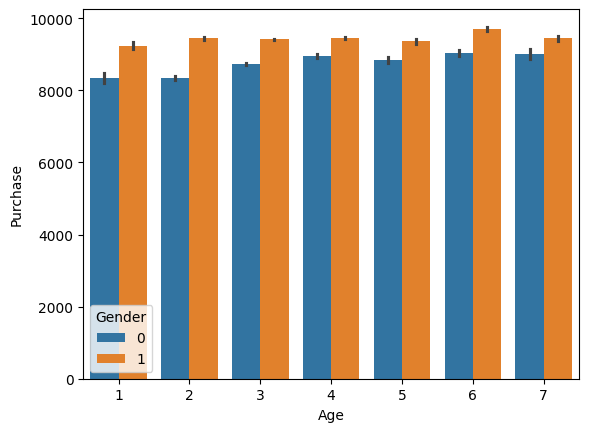

In [ ]:
#visuvalization age vs purchase
sns.barplot(x='Age',y='Purchase',hue='Gender',data=AB)

<Axes: xlabel='Occupation', ylabel='Purchase'>

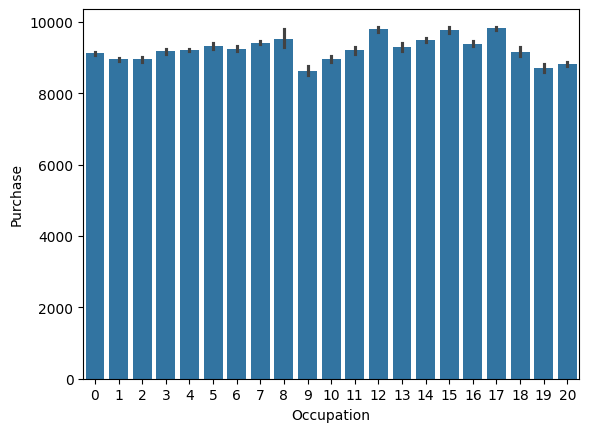

In [ ]:
# purchasing of men is higher than women
# visuvalization of purchase with occupation
sns.barplot(x='Occupation',y='Purchase',data=AB)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

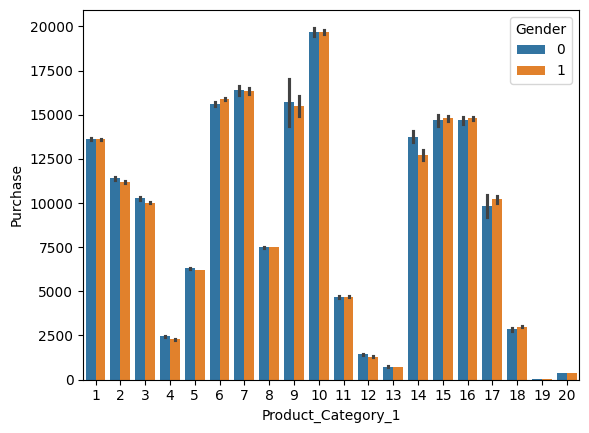

In [ ]:
sns.barplot(x='Product_Category_1' ,y='Purchase',hue='Gender',data=AB)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

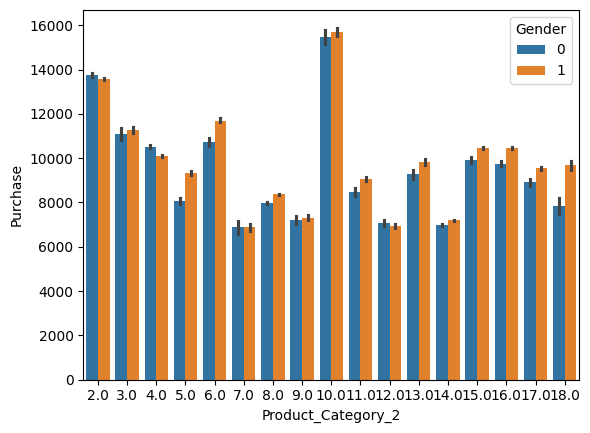

In [ ]:
sns.barplot(x='Product_Category_2' ,y='Purchase',hue='Gender',data=AB)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

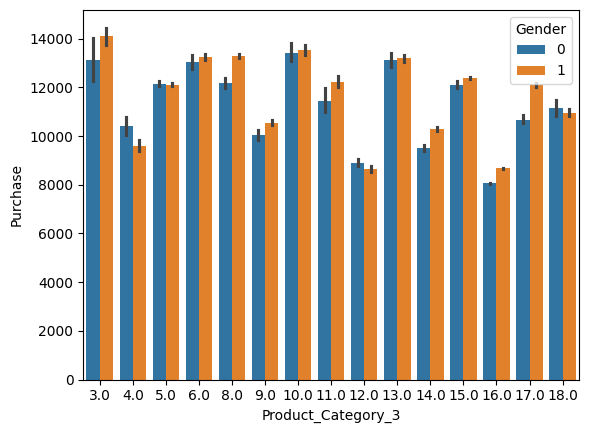

In [ ]:
sns.barplot(x='Product_Category_3' ,y='Purchase',hue='Gender',data=AB)

In [ ]:
AB.drop(['Product_ID'],axis=1,inplace=True)
AB.head(5)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
#feature scaling
df_test=AB[AB['Purchase'].isnull()]
df_train=AB[~AB['Purchase'].isnull()]
df_train.shape
# Fix: Use the correct shape for X
X=df_train.drop('Purchase', axis=1) # Assuming 'Purchase' is your target column
#X.head(5)
#X.shape
y=df_train['Purchase'] # Use df_train for y as well
#y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)